In [1]:
import torch
#import tensorflow as tf

In [2]:
import torch.nn as nn
# tensorflow.keras import models, layers

In [3]:
import matplotlib.pyplot as plt

In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=5

In [5]:
    #dataset = tf.keras.preprocessing.image_dataset_from_directory(
    #"PlantVillage",
    #seed=123,
    #shuffle=True,
    #image_size=(IMAGE_SIZE,IMAGE_SIZE),
    #batch_size=BATCH_SIZE
#)

In [8]:

from torchvision import datasets, transforms
# Define transformations
data_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
])

# Load the dataset
dataset = datasets.ImageFolder(
    root="PlantVillage",
    transform=data_transforms
)

# Create DataLoader for batching and shuffling
data_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=4  # You can adjust this based on your system
)

In [7]:
#class_names = dataset.class_names
#class_names

In [9]:
import os
data_dir = "PlantVillage"
class_names = sorted(os.listdir(data_dir))
print(class_names)



['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [10]:
len(dataset)

2152

In [11]:
#for image_batch, labels_batch in dataset.take(1):
 #   print(image_batch.shape)
  #  print(labels_batch.numpy())

In [11]:
for image_batch, labels_batch in data_loader:
    print(image_batch.shape)  # Shape of the image batch
    print(labels_batch.numpy())  # Convert labels tensor to NumPy array

torch.Size([32, 3, 224, 224])
[1 1 0 1 2 2 1 0 1 0 1 1 0 1 1 2 0 1 0 1 1 0 1 0 0 0 2 0 0 1 0 1]
torch.Size([32, 3, 224, 224])
[1 1 0 1 1 1 0 2 0 0 1 2 0 0 1 0 0 0 0 0 1 0 0 1 2 2 0 1 0 0 0 1]
torch.Size([32, 3, 224, 224])
[0 1 1 0 1 0 1 1 0 1 1 1 2 1 0 1 0 0 0 1 0 1 0 0 0 2 0 2 0 0 1 1]
torch.Size([32, 3, 224, 224])
[1 1 1 0 2 1 1 0 1 2 0 1 0 0 2 0 1 1 2 1 1 0 0 1 1 0 1 1 1 1 1 0]
torch.Size([32, 3, 224, 224])
[2 0 1 0 0 1 2 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1]
torch.Size([32, 3, 224, 224])
[1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0]
torch.Size([32, 3, 224, 224])
[0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 2]
torch.Size([32, 3, 224, 224])
[1 2 1 1 0 0 1 1 1 0 0 0 1 0 0 2 0 0 1 0 1 0 0 1 2 1 0 0 1 0 1 0]
torch.Size([32, 3, 224, 224])
[1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0]
torch.Size([32, 3, 224, 224])
[0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 2 1 1 1 0 0 1 0 1 0 0]
torch.Size([32, 3, 224, 224])
[1 0 0 0 1

In [12]:
32*68

2176

In [13]:
#plt.figure(figsize=(10, 10))
#for image_batch, labels_batch in dataset.take(1):
    #for i in range(12):
       # ax = plt.subplot(3, 4, i + 1)
       # plt.imshow(image_batch[i].numpy().astype("uint8"))
       # plt.title(class_names[labels_batch[i]])
       # plt.axis("off")

In [14]:
import numpy as np

In [16]:
#plt.figure(figsize=(10, 10))
#for image_batch, labels_batch in dataset.take(1):
    #for i in range(12):
       # ax = plt.subplot(3, 4, i + 1)
       # plt.title(class_names[labels_batch[i]])
        #plt.axis("off")

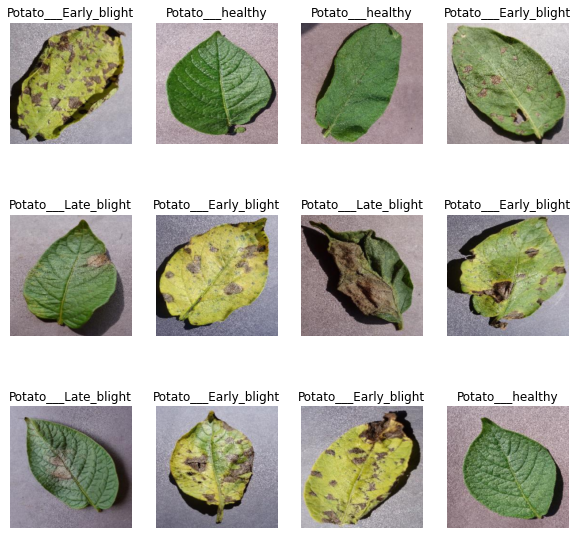

In [15]:
for image_batch, labels_batch in data_loader:
    # Create a figure with a 3x4 grid of subplots
    plt.figure(figsize=(10, 10))
    for i in range(min(len(image_batch), 12)):  # Limiting to the first 12 images
        # Plot the image
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(np.transpose(image_batch[i], (1, 2, 0)))  # Transpose the image tensor to (H, W, C) for plotting
        plt.title(class_names[labels_batch[i].item()])
        plt.axis("off")
    plt.show()
    break 

In [17]:
train_size = 0.8
len(dataset)*train_size

1721.6000000000001

In [18]:
#train_ds = dataset.take(54)
#len(train_ds)

In [19]:
num_samples = 54
train_ds = torch.utils.data.Subset(dataset, range(num_samples))

In [20]:
#test_ds = dataset.skip(54)
#len(test_ds)

In [21]:
start_index = 54
test_ds = torch.utils.data.Subset(dataset, range(start_index, len(dataset)))


In [22]:
val_size=0.1
len(dataset)*val_size

215.20000000000002

In [23]:
#val_ds = test_ds.take(6)
#len(val_ds)

In [24]:
num_samples_validation = 6
val_ds = torch.utils.data.Subset(test_ds, range(num_samples_validation))

In [25]:
#test_ds = test_ds.skip(6)
#len(test_ds)

In [25]:
num_samples_validation = 6
test_ds = torch.utils.data.Subset(test_ds, range(num_samples_validation, len(test_ds)))


In [26]:
#def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    #assert (train_split + test_split + val_split) == 1
    
    #ds_size = len(ds)
    
    #if shuffle:
       #ds = ds.shuffle(shuffle_size, seed=12)
    
    #train_size = int(train_split * ds_size)
    #val_size = int(val_split * ds_size)
    
    #train_ds = ds.take(train_size)    
    #val_ds = ds.skip(train_size).take(val_size)
    #test_ds = ds.skip(train_size).skip(val_size)
    
    #return train_ds, val_ds, test_ds

In [27]:

from torch.utils.data import DataLoader, random_split

def get_dataset_partitions_pytorch(dataset, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    dataset_size = len(dataset)
    
    if shuffle:
        # Create indices for shuffling
        indices = torch.randperm(dataset_size)
        # Shuffle the dataset based on indices
        dataset = torch.utils.data.Subset(dataset, indices)
    
    train_size = int(train_split * dataset_size)
    val_size = int(val_split * dataset_size)
    test_size = dataset_size - train_size - val_size
    
    # Split the dataset
    train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
        dataset, [train_size, val_size, test_size]
    )
    
    return train_dataset, val_dataset, test_dataset

# Usage example:
# Assuming 'dataset' is your PyTorch dataset
train_dataset, val_dataset, test_dataset = get_dataset_partitions_pytorch(dataset)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)


In [28]:
#train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [28]:

def get_dataset_partitions_pytorch(dataset, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    dataset_size = len(dataset)
    
    if shuffle:
        # Create indices for shuffling
        indices = torch.randperm(dataset_size)
        # Shuffle the dataset based on indices
        dataset = torch.utils.data.Subset(dataset, indices)
    
    train_size = int(train_split * dataset_size)
    val_size = int(val_split * dataset_size)
    test_size = dataset_size - train_size - val_size
    
    # Split the dataset
    train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
        dataset, [train_size, val_size, test_size]
    )
    
    return train_dataset, val_dataset, test_dataset

# Usage example:
# Assuming 'dataset' is your PyTorch dataset
train_ds, val_ds, test_ds = get_dataset_partitions_pytorch(dataset)


In [29]:
len(train_ds)

1721

In [30]:
len(val_ds)

215

In [31]:
len(test_ds)

216

In [32]:
#train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [32]:
from torch.utils.data import DataLoader

# Assuming you have already created train_ds, val_ds, and test_ds

# Define batch sizes
batch_size = 64

# Create DataLoader instances for train, val, and test datasets
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=True, num_workers=4)

In [77]:
#resize_and_rescale = tf.keras.Sequential([
 # layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
 # layers.experimental.preprocessing.Rescaling(1./255),
#])

In [33]:
import torchvision.transforms as transforms

# Define the desired image size
IMAGE_SIZE = 224  # Example size, replace with your desired size

# Define the sequence of transforms
resize_and_rescale = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.0, 0.0, 0.0], std=[1.0/255.0, 1.0/255.0, 1.0/255.0])
])


In [79]:
#data_augmentation = tf.keras.Sequential([
 # layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
#  layers.experimental.preprocessing.RandomRotation(0.2),
#])

In [34]:
data_augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # Randomly flip the image horizontally with probability 0.5
    transforms.RandomVerticalFlip(p=0.5),    # Randomly flip the image vertically with probability 0.5
    transforms.RandomRotation(degrees=20),    # Randomly rotate the image by a maximum of 20 degrees
])

# Usage example:
# Assuming 'dataset' is your PyTorch dataset
# Apply data augmentation to your dataset
augmented_dataset = [(data_augmentation(image), label) for image, label in dataset]


In [81]:
#train_ds = train_ds.map(
 #   lambda x, y: (data_augmentation(x, training=True), y)
#).prefetch(buffer_size=tf.data.AUTOTUNE)

In [35]:


# Assuming 'train_dataset' is your PyTorch dataset
# Define data augmentation transforms
data_augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # Randomly flip the image horizontally with probability 0.5
    transforms.RandomVerticalFlip(p=0.5),    # Randomly flip the image vertically with probability 0.5
    transforms.RandomRotation(degrees=20),    # Randomly rotate the image by a maximum of 20 degrees
])

# Define a custom dataset class to apply data augmentation
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __getitem__(self, index):
        image, label = self.dataset[index]
        if self.transform:
            image = self.transform(image)
        return image, label

    def __len__(self):
        return len(self.dataset)

# Apply data augmentation to the training dataset
train_dataset_augmented = CustomDataset(train_dataset, transform=data_augmentation)

# Create a DataLoader with prefetching
train_loader = DataLoader(
    train_dataset_augmented,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=4,  # You can adjust this based on your system
    pin_memory=True
)


In [36]:

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Assuming you have already created train_ds as a PyTorch dataset

# Define the sequence of data augmentation transforms for training
data_augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=20),
])

# Create a DataLoader for the training dataset with data augmentation
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)

# Apply data augmentation dynamically during training
augmented_train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
for batch in augmented_train_loader:
    images, labels = batch
    images_augmented = torch.stack([data_augmentation(image) for image in images])
    # Train your model using images_augmented and labels


In [39]:
import torch
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self, n_classes):
        super(CNNModel, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels=CHANNELS, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * (IMAGE_SIZE // 64) ** 2, 64),
            nn.ReLU(),
            nn.Linear(64, n_classes),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# Create an instance of the model
model = CNNModel(n_classes)

# Print model summary
print(model)


CNNModel(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1

In [40]:
#model.summary()
print(model)

CNNModel(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Assuming you have defined your model and datasets
# Define optimizer
optimizer = optim.Adam(model.parameters())

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define the number of epochs
epochs = 5

# Training loop
for epoch in range(epochs):
    # Training
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        correct_train += predicted.eq(targets).sum().item()
        total_train += targets.size(0)
        
    train_loss = train_loss / len(train_loader.dataset)
    train_accuracy = correct_train / total_train
    
    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            val_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
 


In [44]:
#scores = model.evaluate(test_ds)

In [46]:
import torch

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set the model to evaluation mode and move it to the device
model.eval()
model.to(device)

total_correct = 0
total_samples = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        # Move inputs and targets to the device
        inputs = inputs.to(device)
        targets = targets.to(device)
        
        # Forward pass
        outputs = model(inputs)
        
        # Get predictions
        _, predicted = outputs.max(1)
        
        # Update total correct and total samples
        total_correct += predicted.eq(targets).sum().item()
        total_samples += targets.size(0)

# Calculate accuracy
accuracy = total_correct / total_samples
print(f'Test Accuracy: {accuracy:.4f}')


Test Accuracy: 0.8241


In [51]:
#scores
# Set the model to evaluation mode and move it to the device
model.eval()
model.to(device)

# List to store the predicted scores
all_scores = []

with torch.no_grad():
    for inputs, _ in test_loader:
        # Move inputs to the device
        inputs = inputs.to(device)
        
        # Forward pass
        outputs = model(inputs)
        
        # Append the predicted scores
        all_scores.append(outputs.cpu().numpy())  # Convert to numpy array and move to CPU

# Concatenate the scores from all batches
scores = np.concatenate(all_scores)

# Now 'scores' contains the predicted scores for each class for each sample in the test dataset


In [52]:
history

import torch
#import tensorflow as tf
import torch.nn as nn
# tensorflow.keras import models, layers
import matplotlib.pyplot as plt
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=5
    #dataset = tf.keras.preprocessing.image_dataset_from_directory(
    #"PlantVillage",
    #seed=123,
    #shuffle=True,
    #image_size=(IMAGE_SIZE,IMAGE_SIZE),
    #batch_size=BATCH_SIZE
#)


# Define transformations
data_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
])

# Load the dataset
dataset = datasets.ImageFolder(
    root="PlantVillage",
    transform=data_transforms
)

# Create DataLoader for batching and shuffling
data_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=4  # You can adjust this based on your system
)
IMAGE_SIZE = 224
BATCH_SIZE = 32

# Define transformations
data_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    tr

In [55]:
#history.history.keys()
# Define an empty dictionary to store training history
history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}

# During training, you can append the metrics to this dictionary
for epoch in range(epochs):
    # Set the model to training mode
    model.train()
    
    # Variables to track training loss and correct predictions
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    
    # Iterate over the training dataset
    for inputs, targets in train_loader:
        # Move inputs and targets to the device
        inputs = inputs.to(device)
        targets = targets.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        
        # Calculate loss
        loss = criterion(outputs, targets)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Update training loss
        train_loss += loss.item() * inputs.size(0)
        
        # Get predicted labels
        _, predicted = torch.max(outputs, 1)
        
        # Update correct predictions
        correct_train += (predicted == targets).sum().item()
        
        # Update total samples
        total_train += targets.size(0)
    
    # Calculate average training loss and accuracy
    train_loss = train_loss / total_train
    train_accuracy = correct_train / total_train
    
    # Validate the model
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    
    # Disable gradient calculation during validation
    with torch.no_grad():
        for inputs, targets in val_loader:
            # Move inputs and targets to the device
            inputs = inputs.to(device)
            targets = targets.to(device)
            
            # Forward pass
            outputs = model(inputs)
            
            # Calculate loss
            loss = criterion(outputs, targets)
            
            # Update validation loss
            val_loss += loss.item() * inputs.size(0)
            
            # Get predicted labels
            _, predicted = torch.max(outputs, 1)
            
            # Update correct predictions
            correct_val += (predicted == targets).sum().item()
            
            # Update total samples
            total_val += targets.size(0)
    
    # Calculate average validation loss and accuracy
    val_loss = val_loss / total_val
    val_accuracy = correct_val / total_val
    
    # Append the metrics to the history dictionary
    history['loss'].append(train_loss)
    history['accuracy'].append(train_accuracy)
    history['val_loss'].append(val_loss)
    history['val_accuracy'].append(val_accuracy)

# Now you can access the keys of the history dictionary
keys = list(history.keys())




In [41]:
history.history['accuracy']

[0.46412035822868347,
 0.6006944179534912,
 0.7708333134651184,
 0.8616898059844971,
 0.8952546119689941]

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

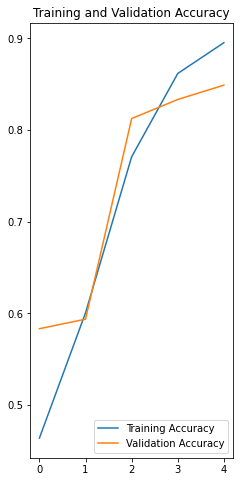

In [43]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


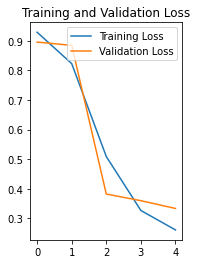

In [44]:
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 554ms/step
predicted label: Potato___Late_blight


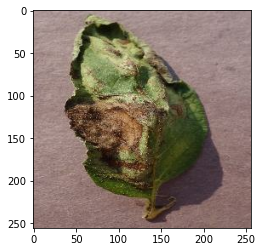

In [45]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [46]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 28ms/step


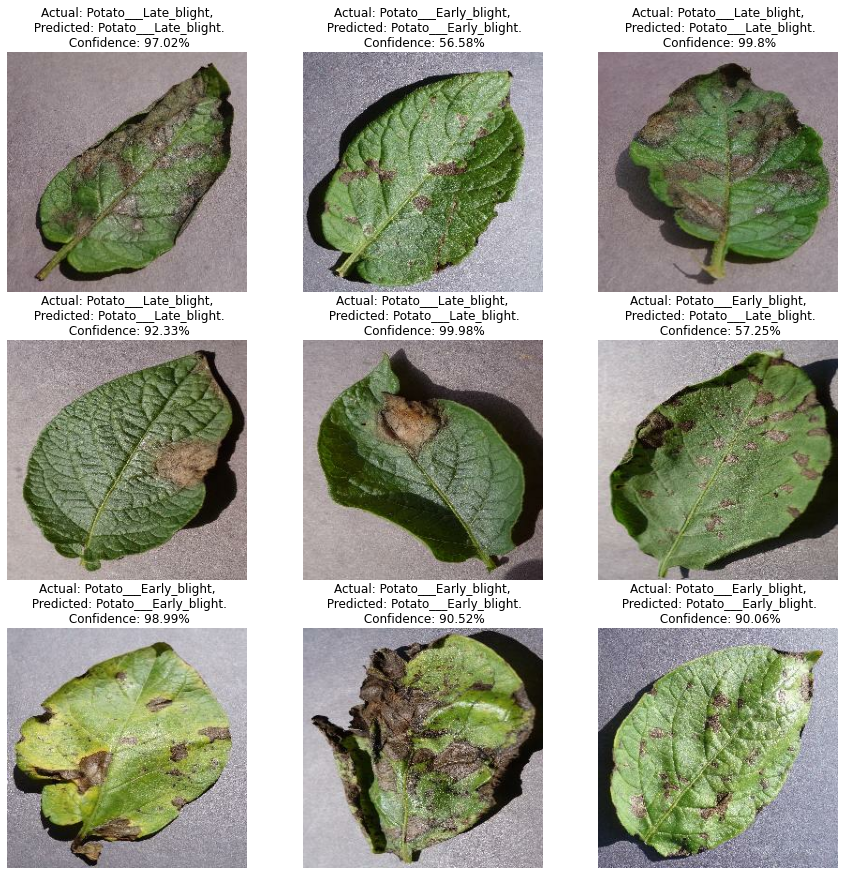

In [47]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [51]:

#model_version= 2
#model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


In [52]:

#import os
#os.listdir(f"../models")


['1', '2']

In [54]:
#automatically increase directory
model_version= max([int(i) for i in os.listdir(f"../models") + [0]])+1